首先读取数据

In [256]:
import pickle
import sys
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import random
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter
plt.rcParams['font.family'] = ['Simhei']  # 中文显示

设置相应的超参数

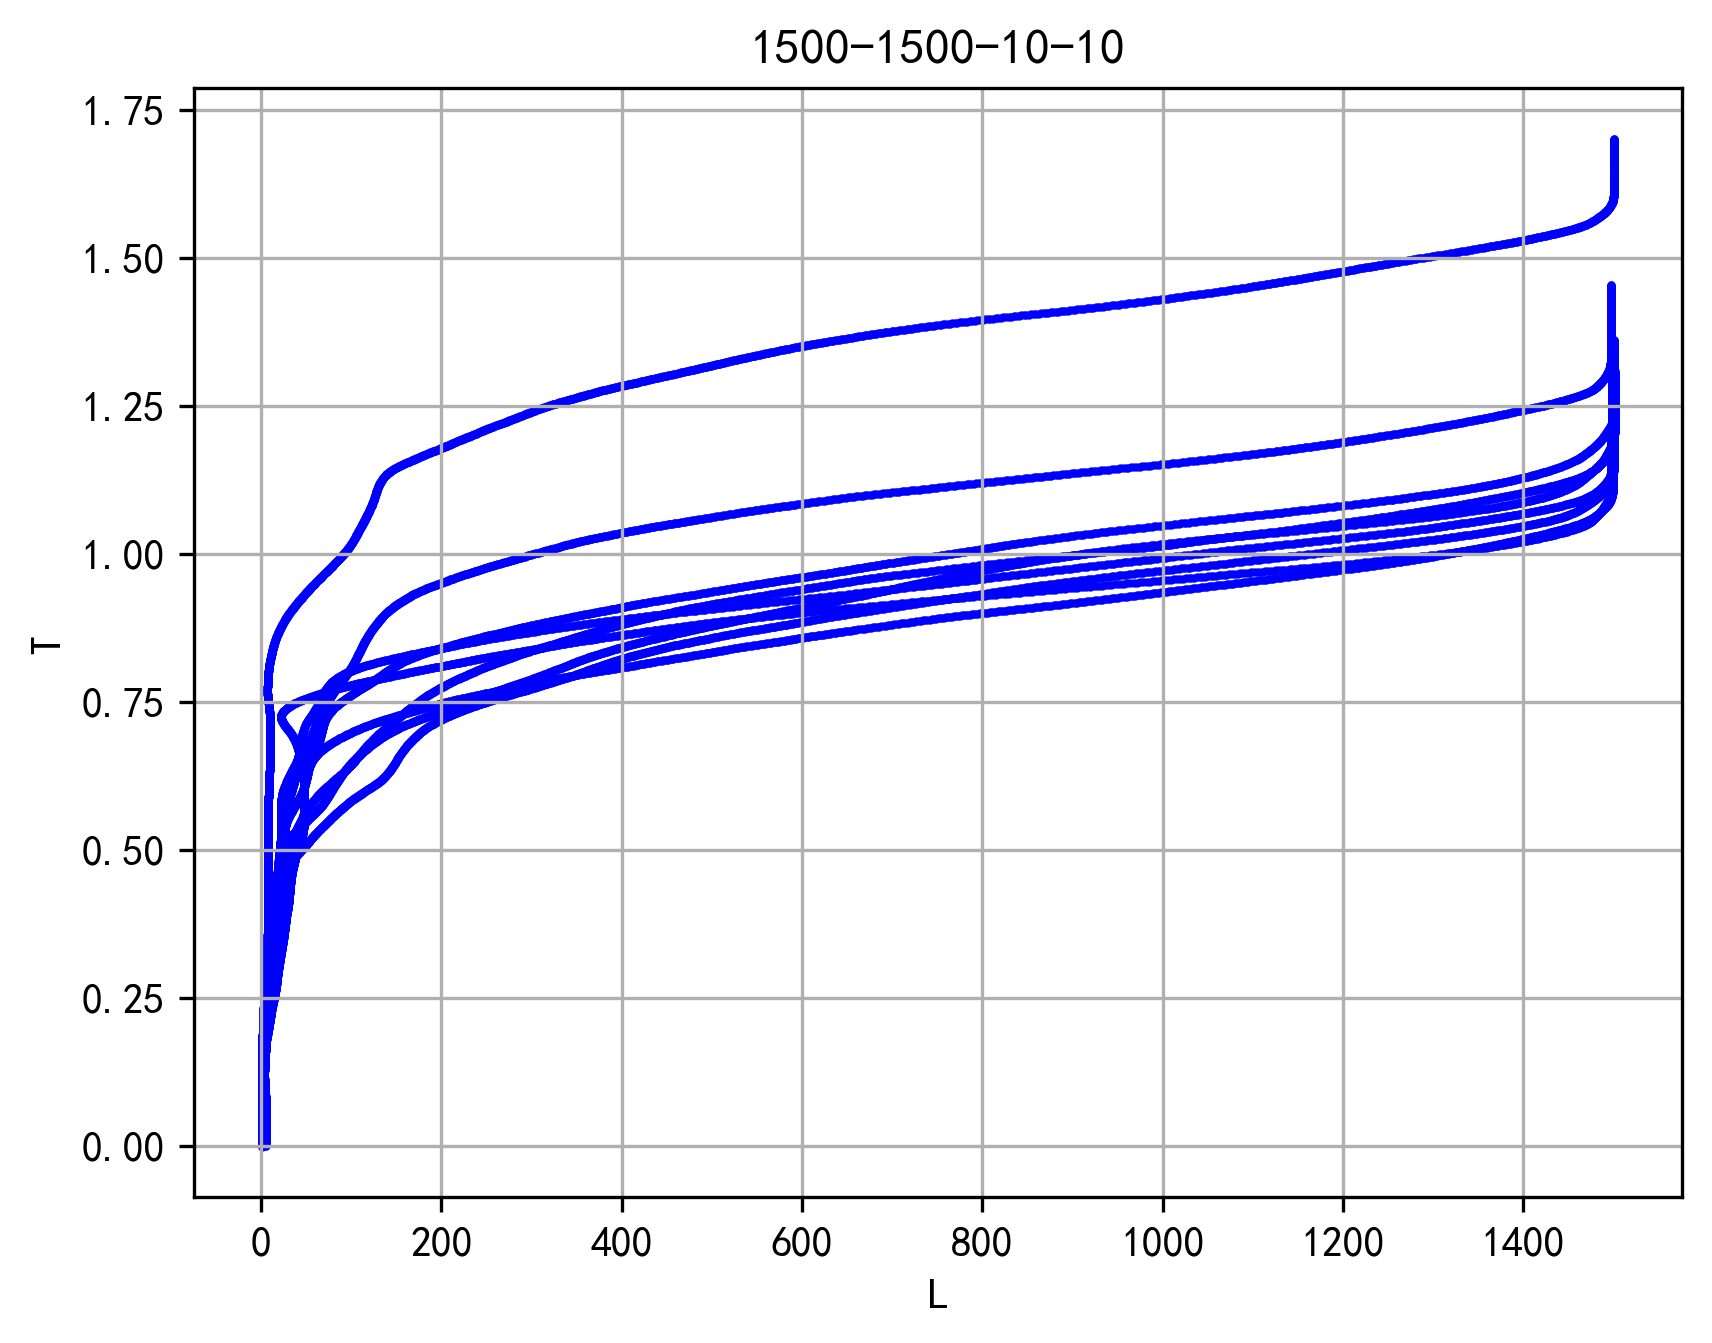

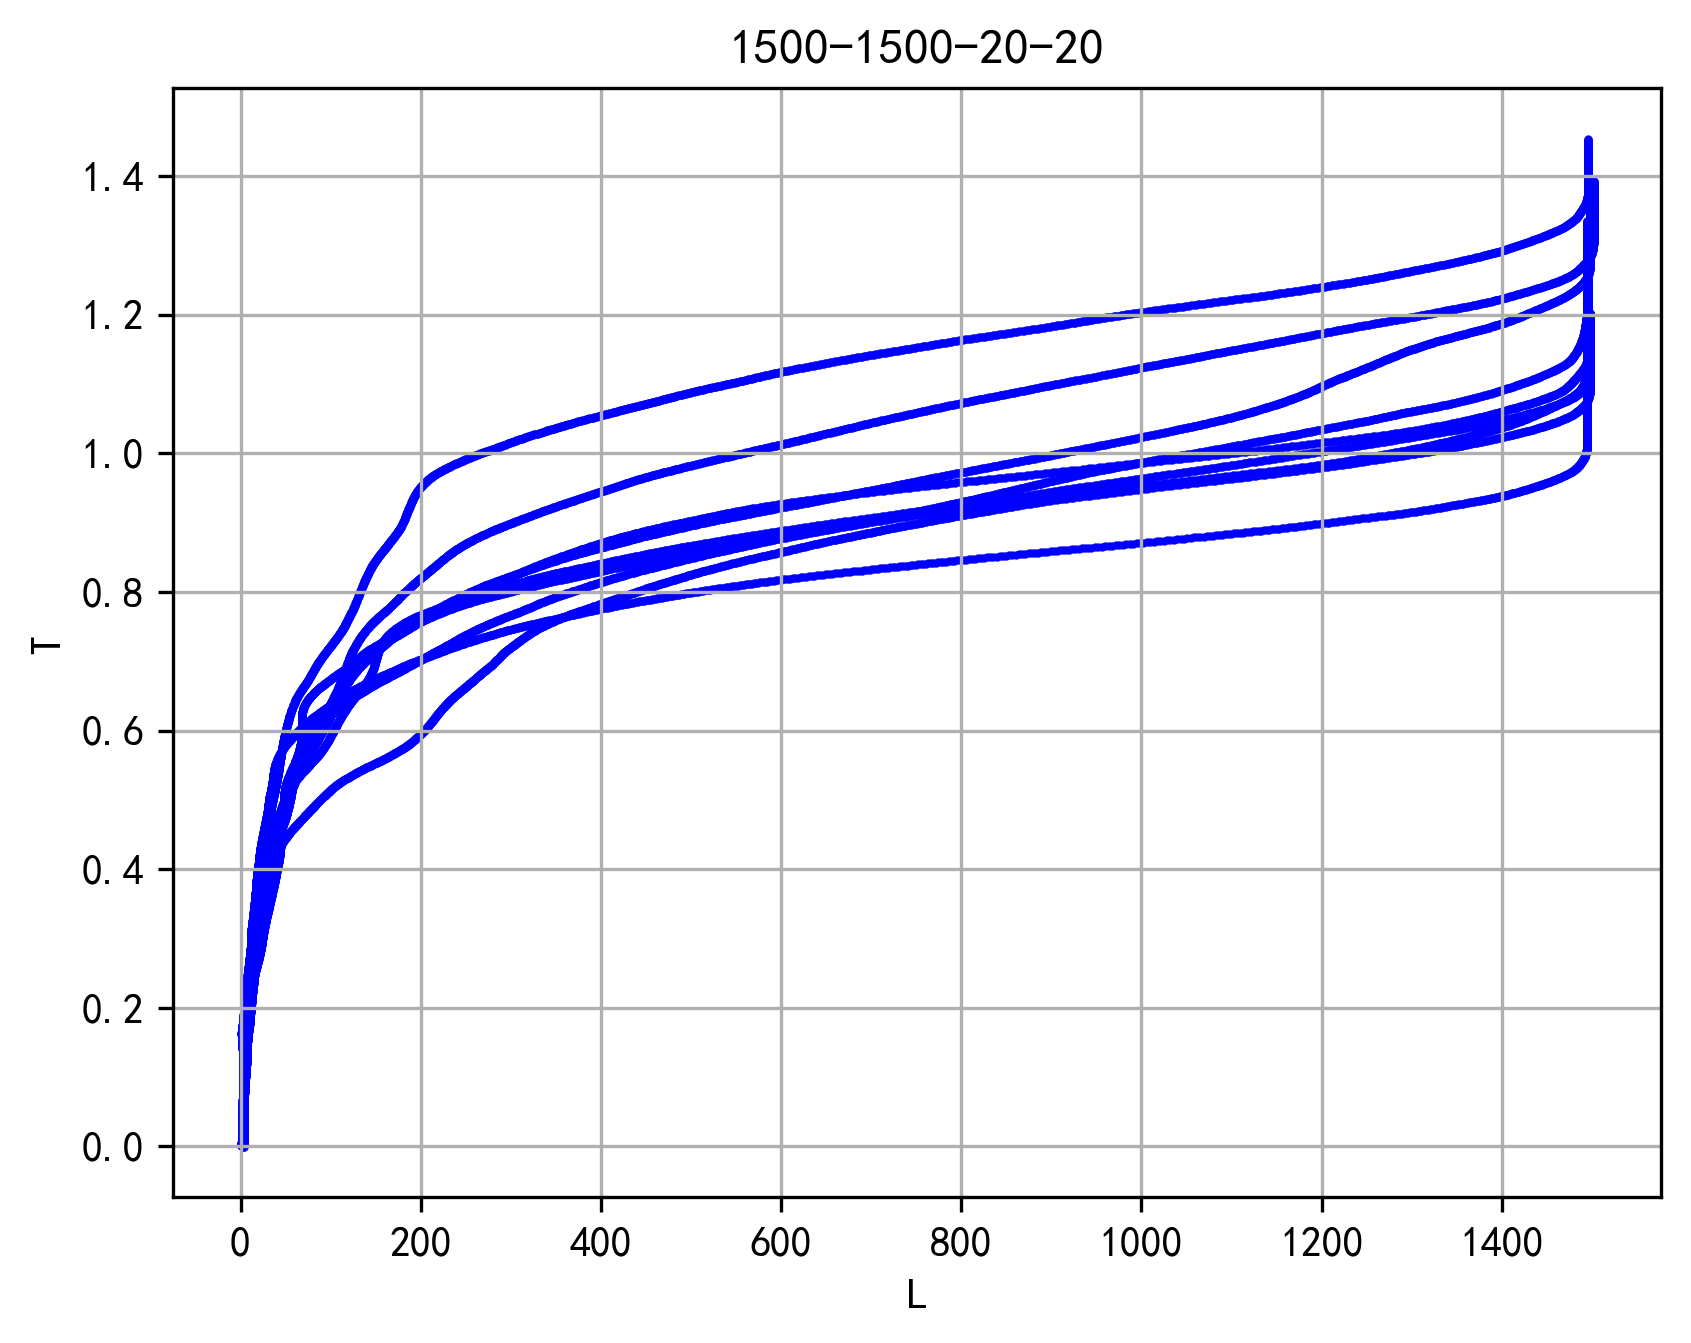

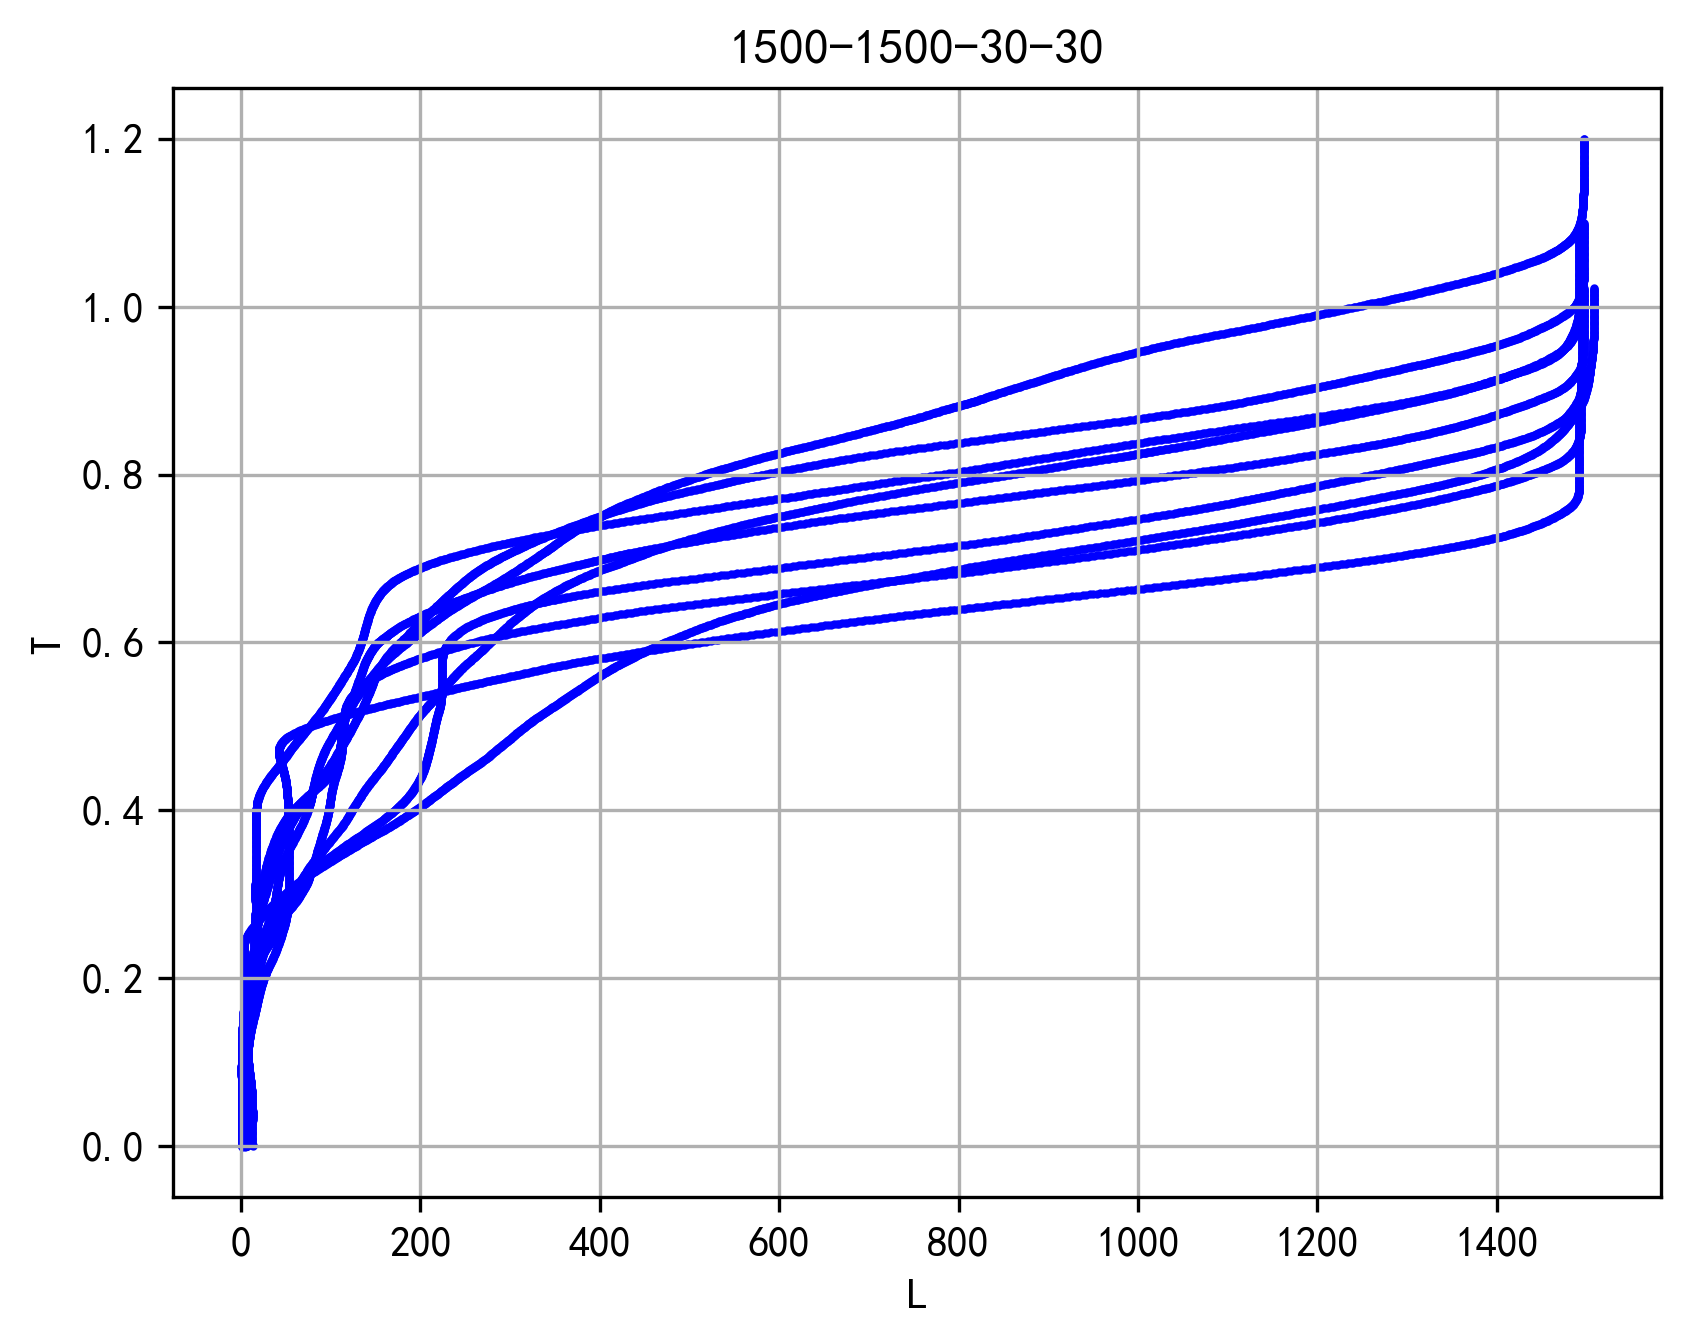

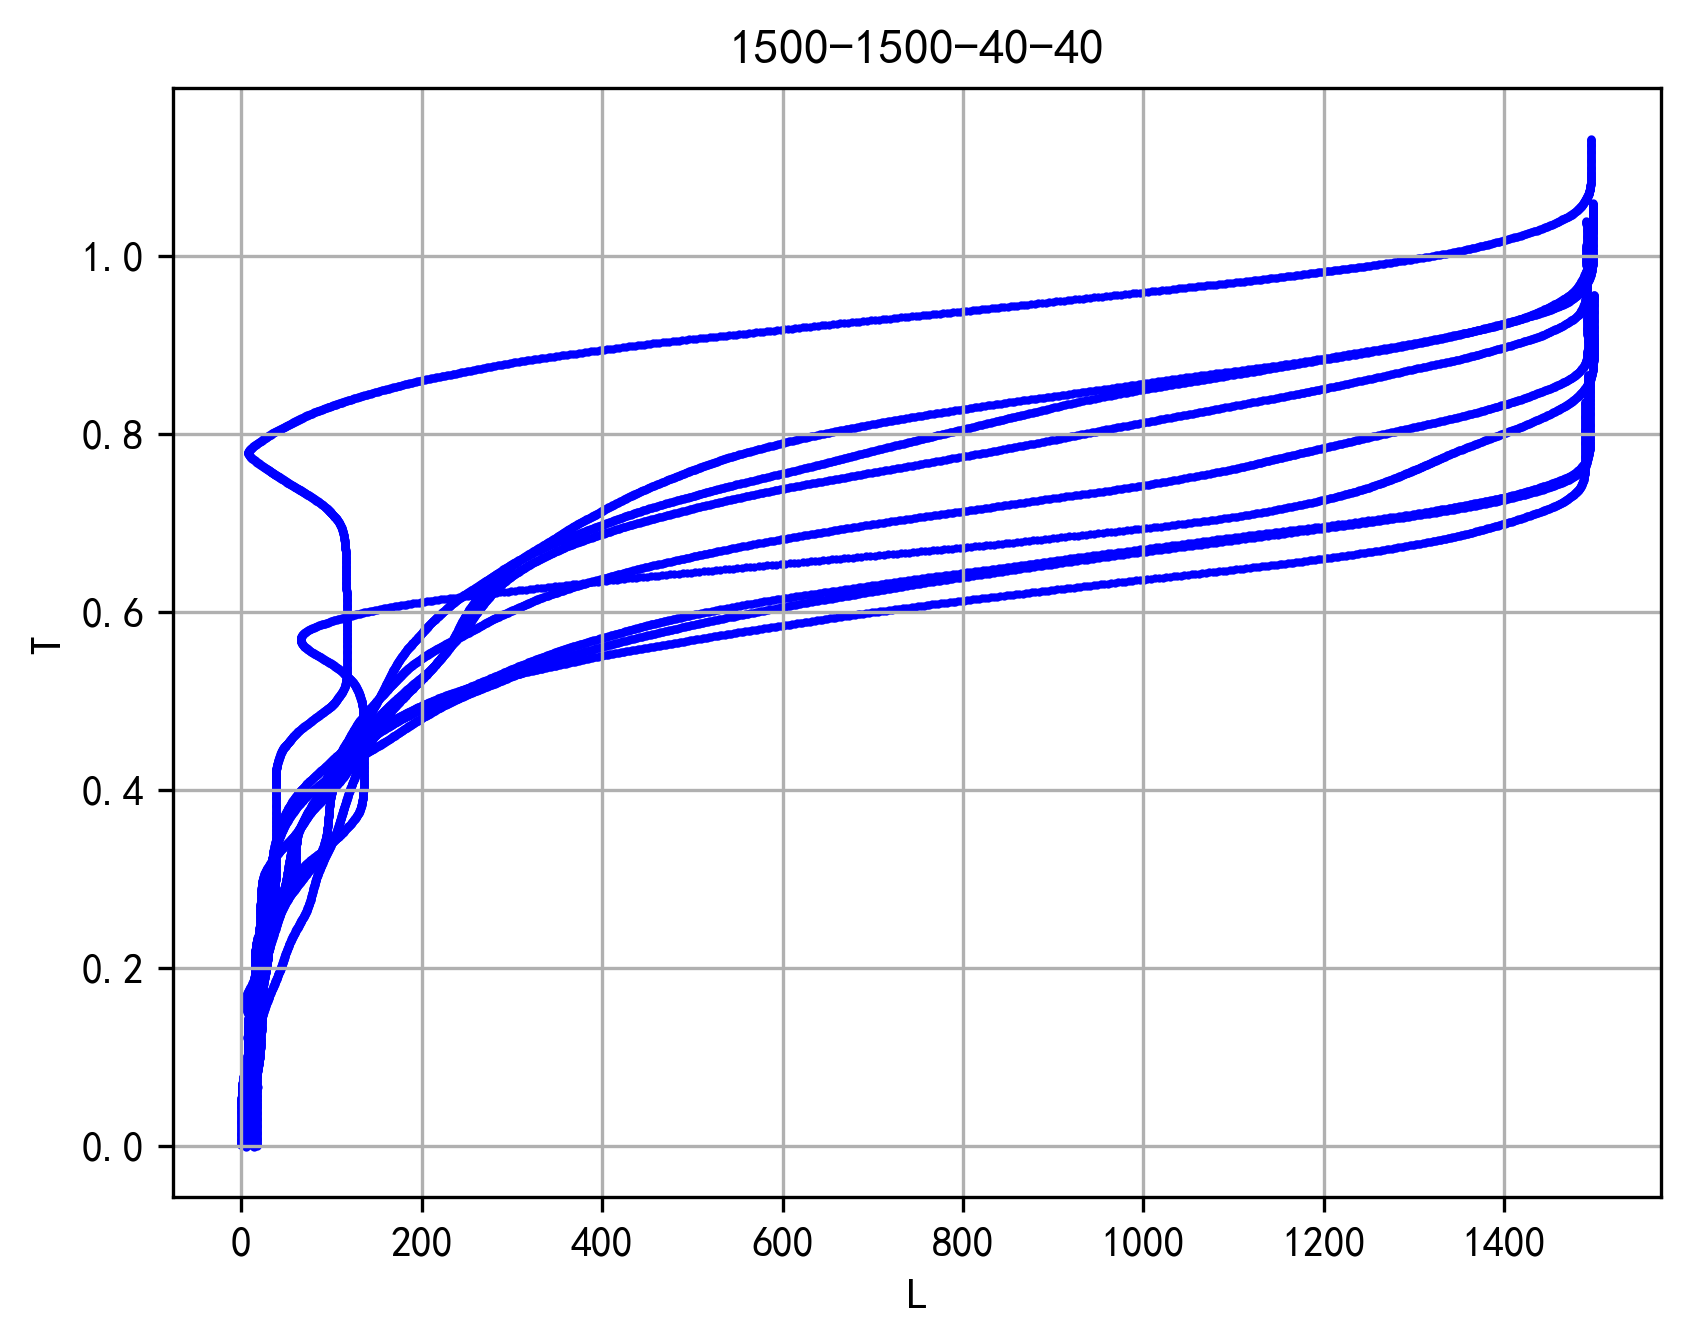

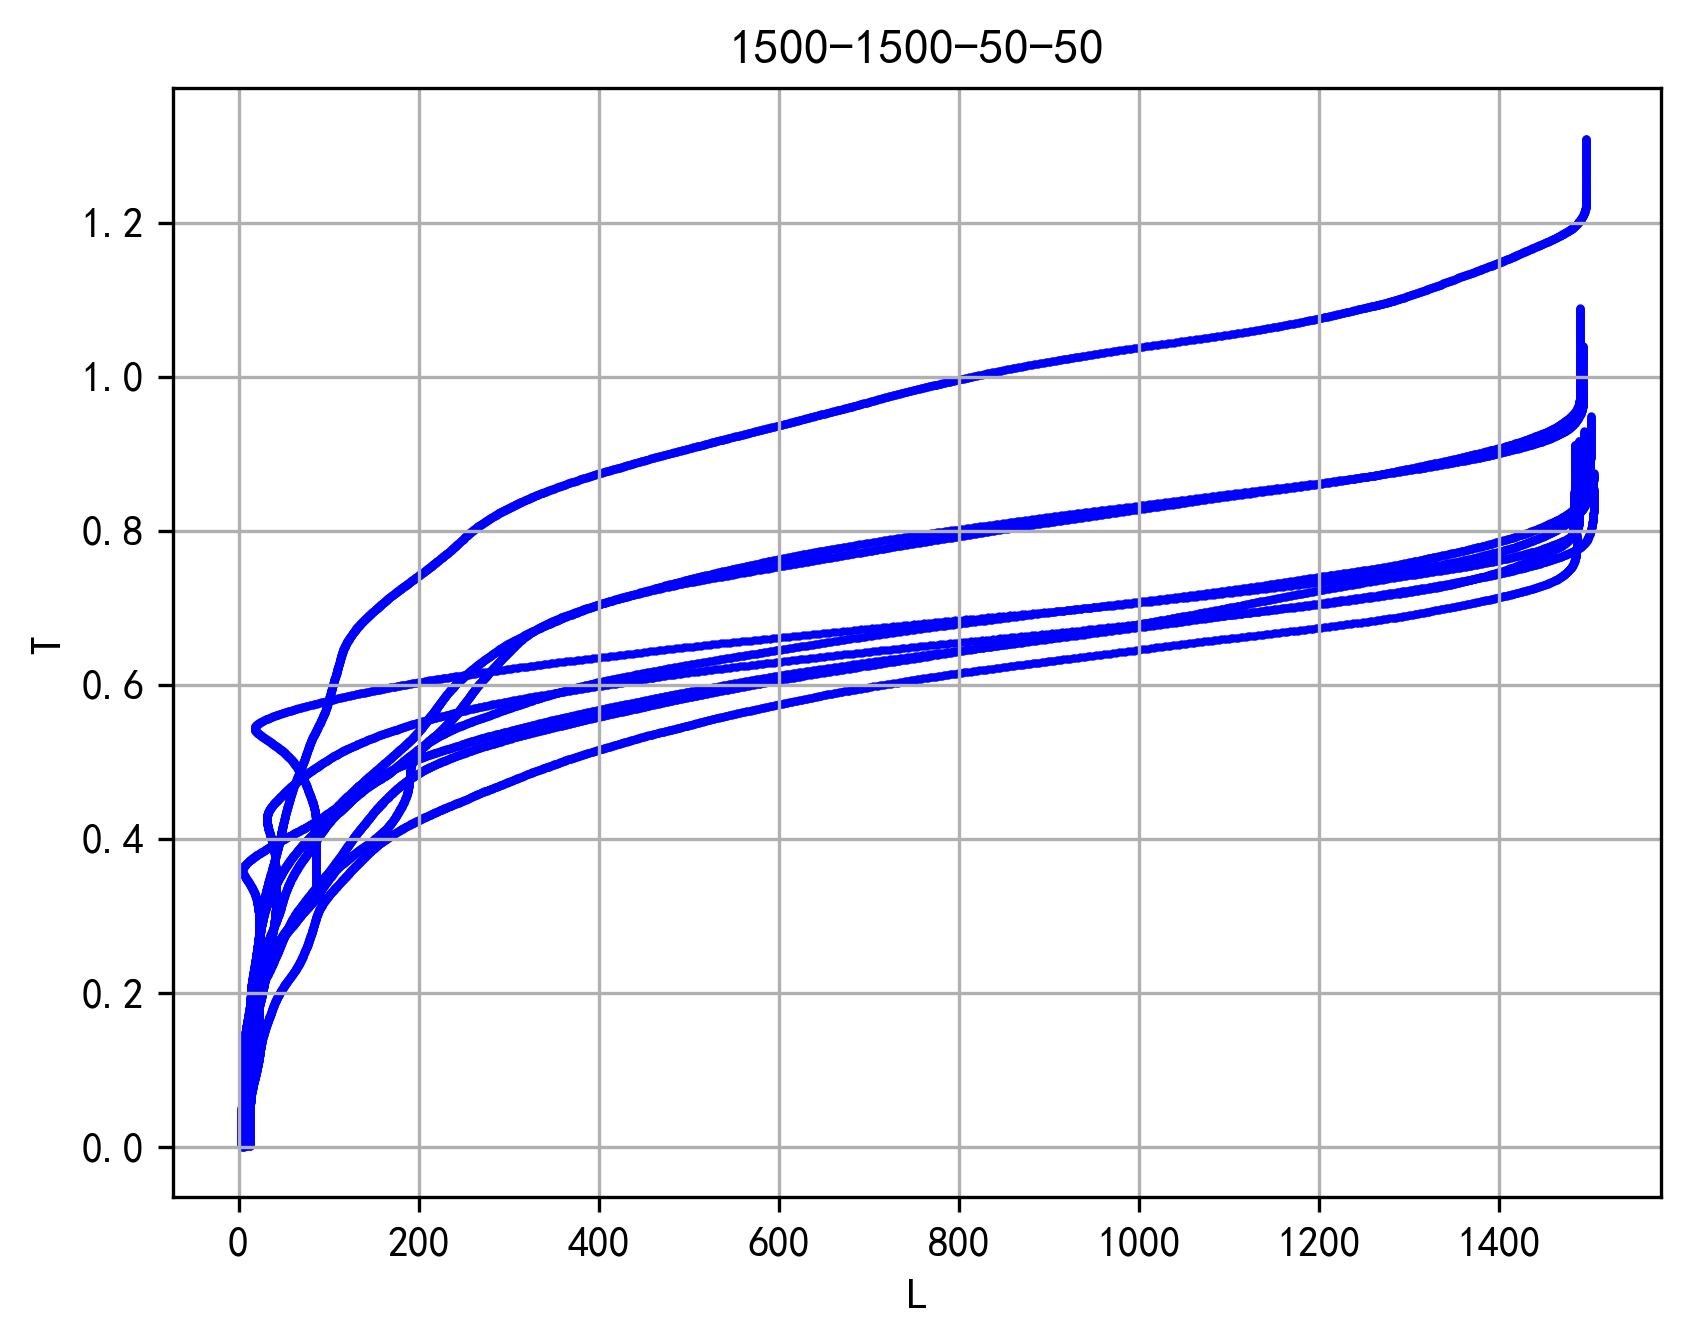

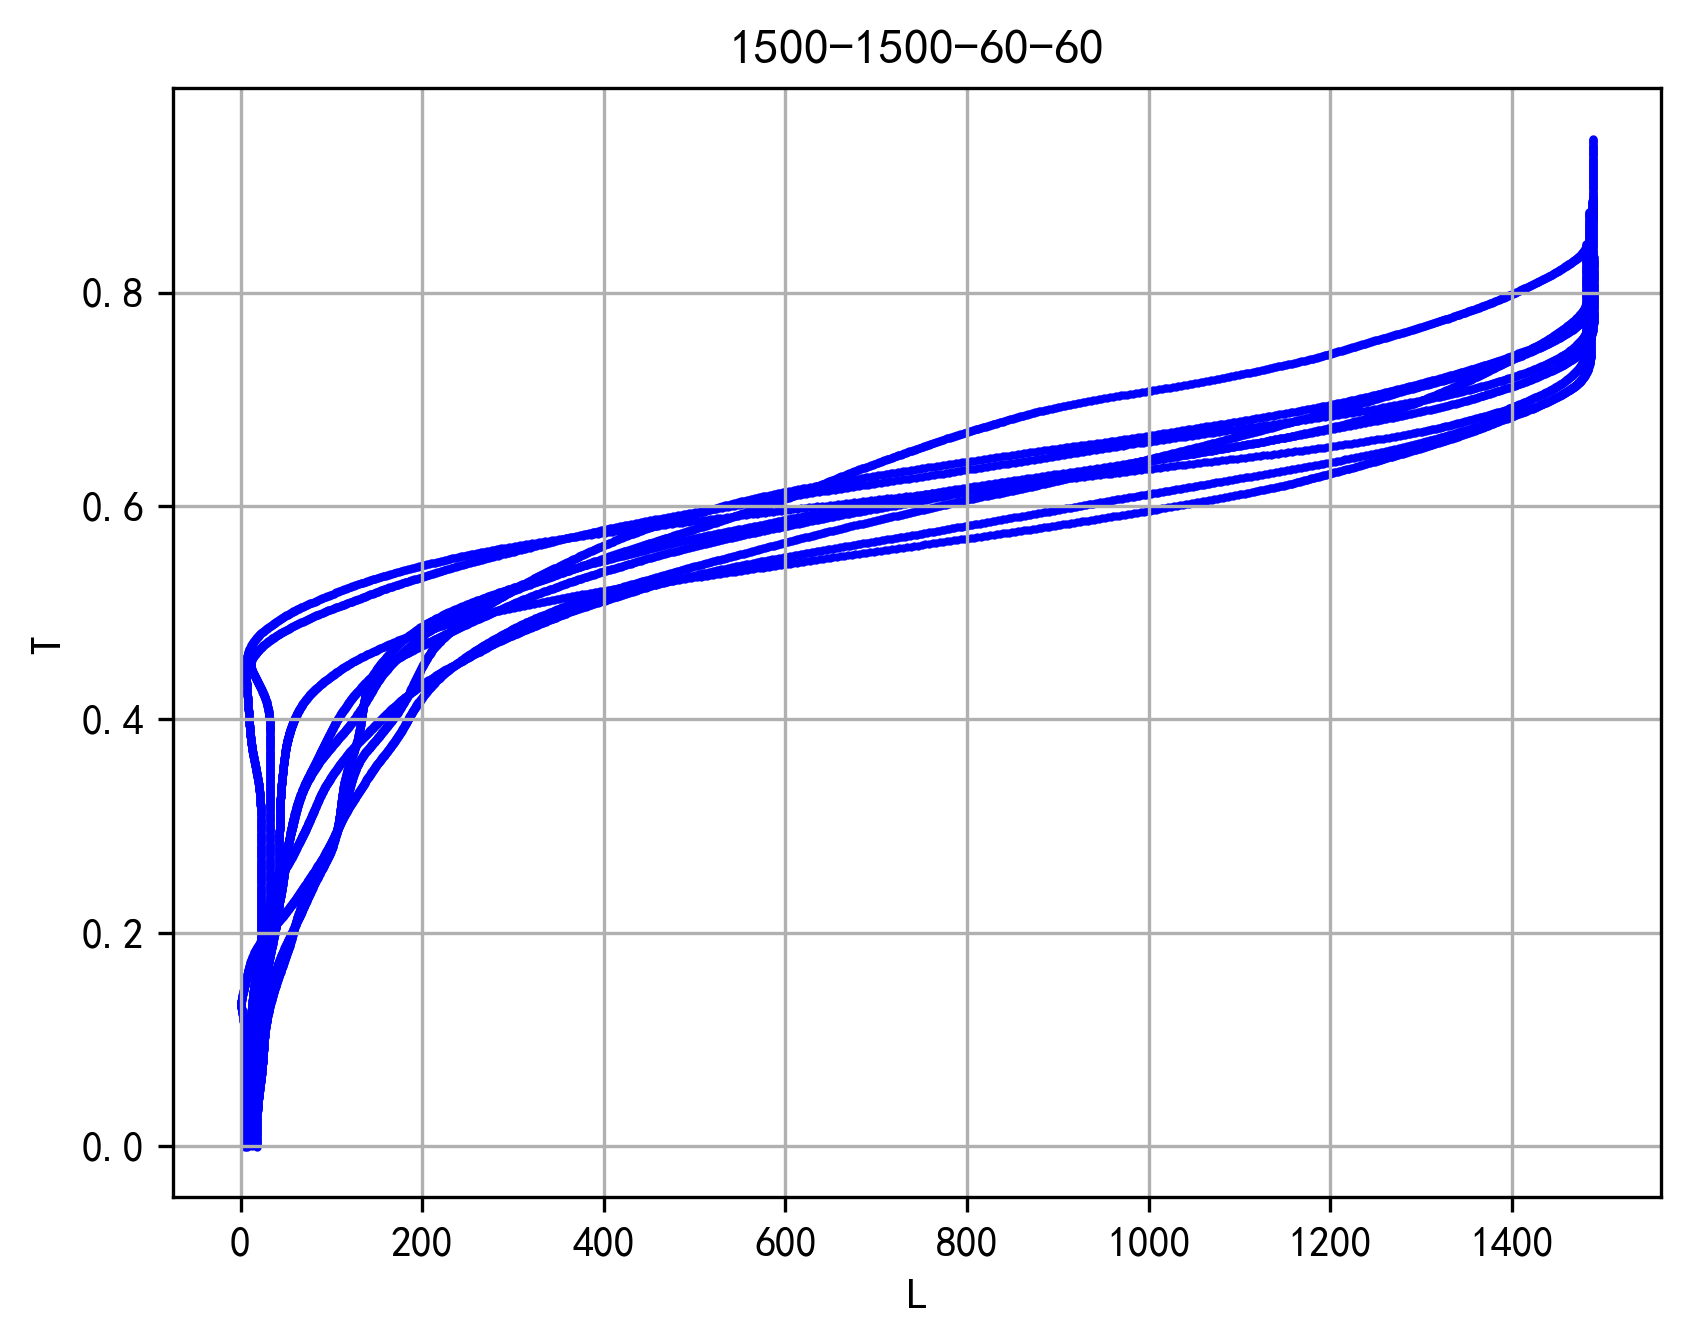

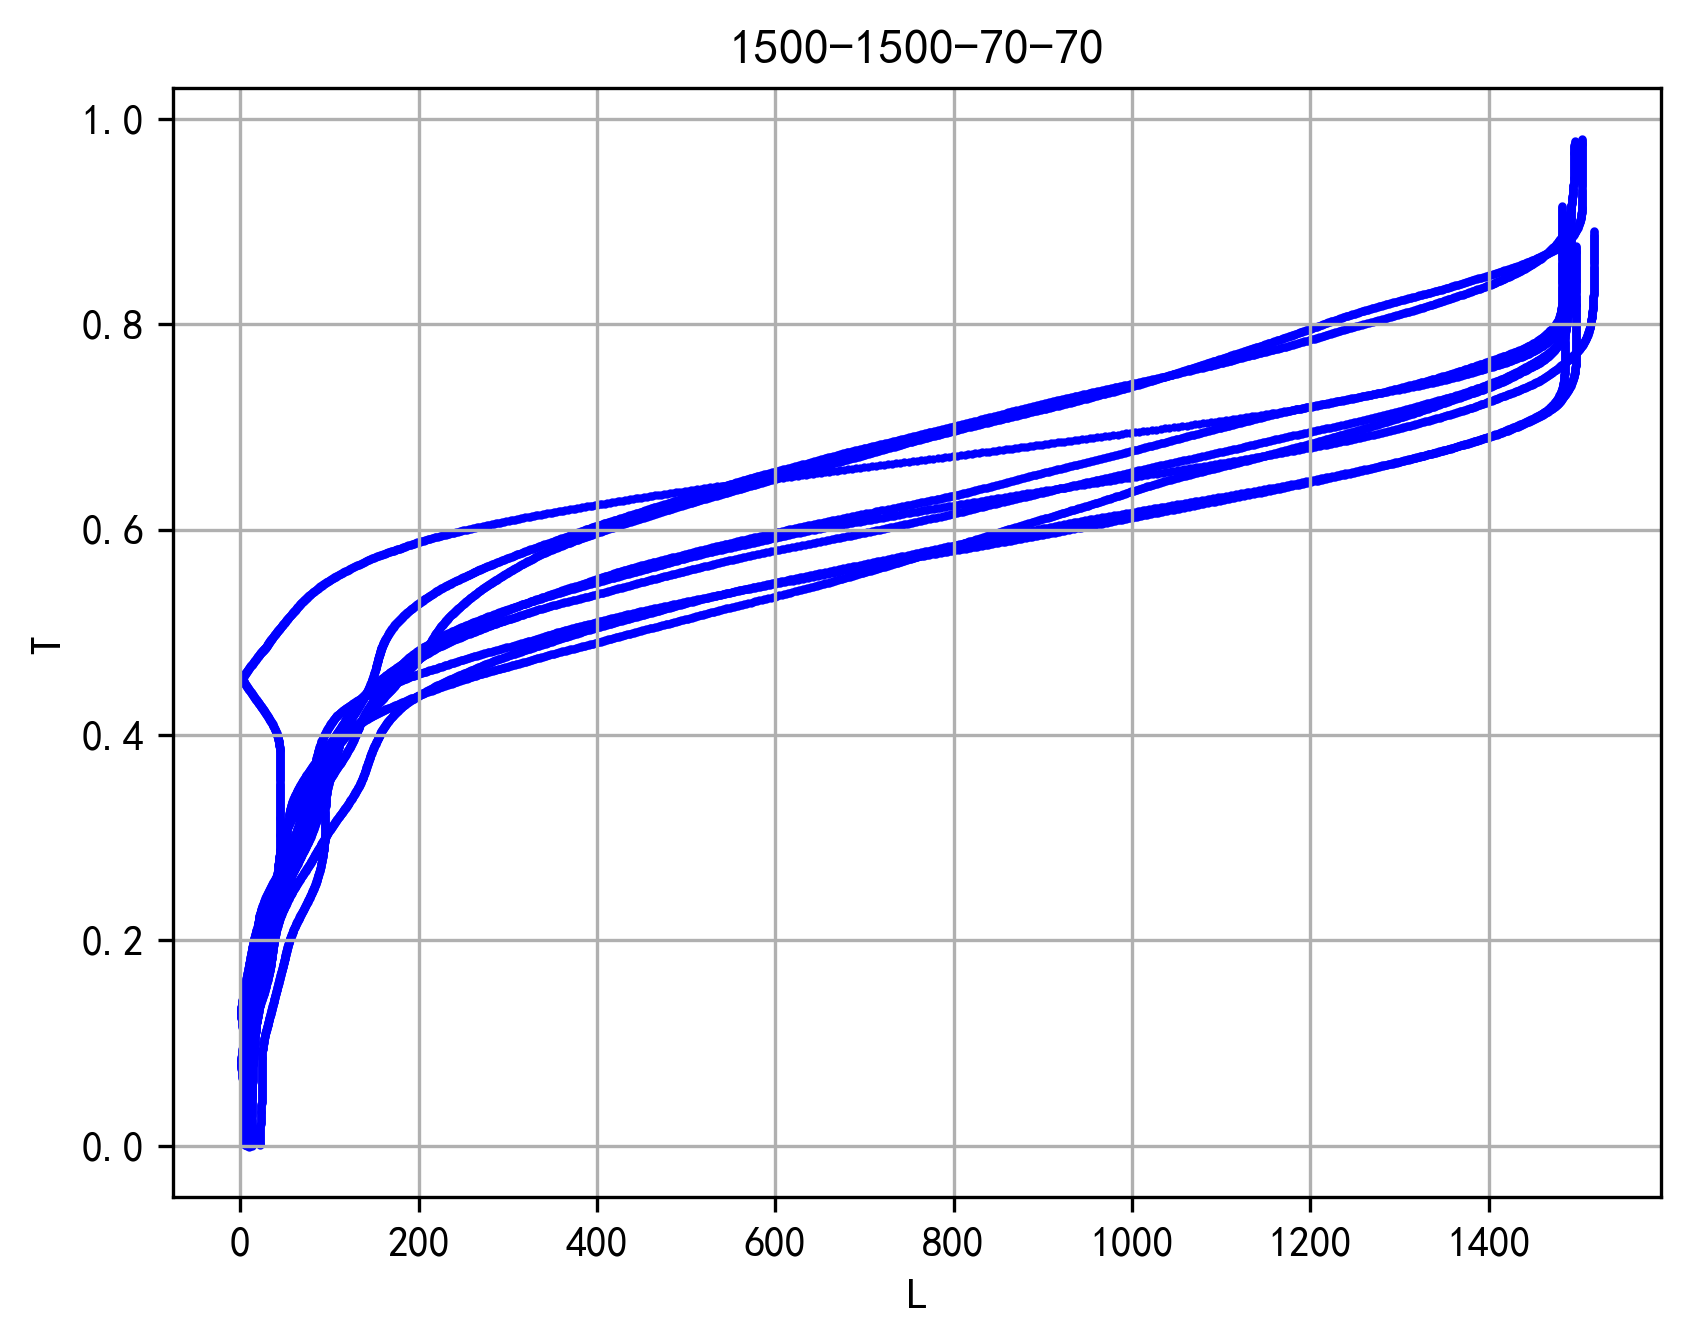

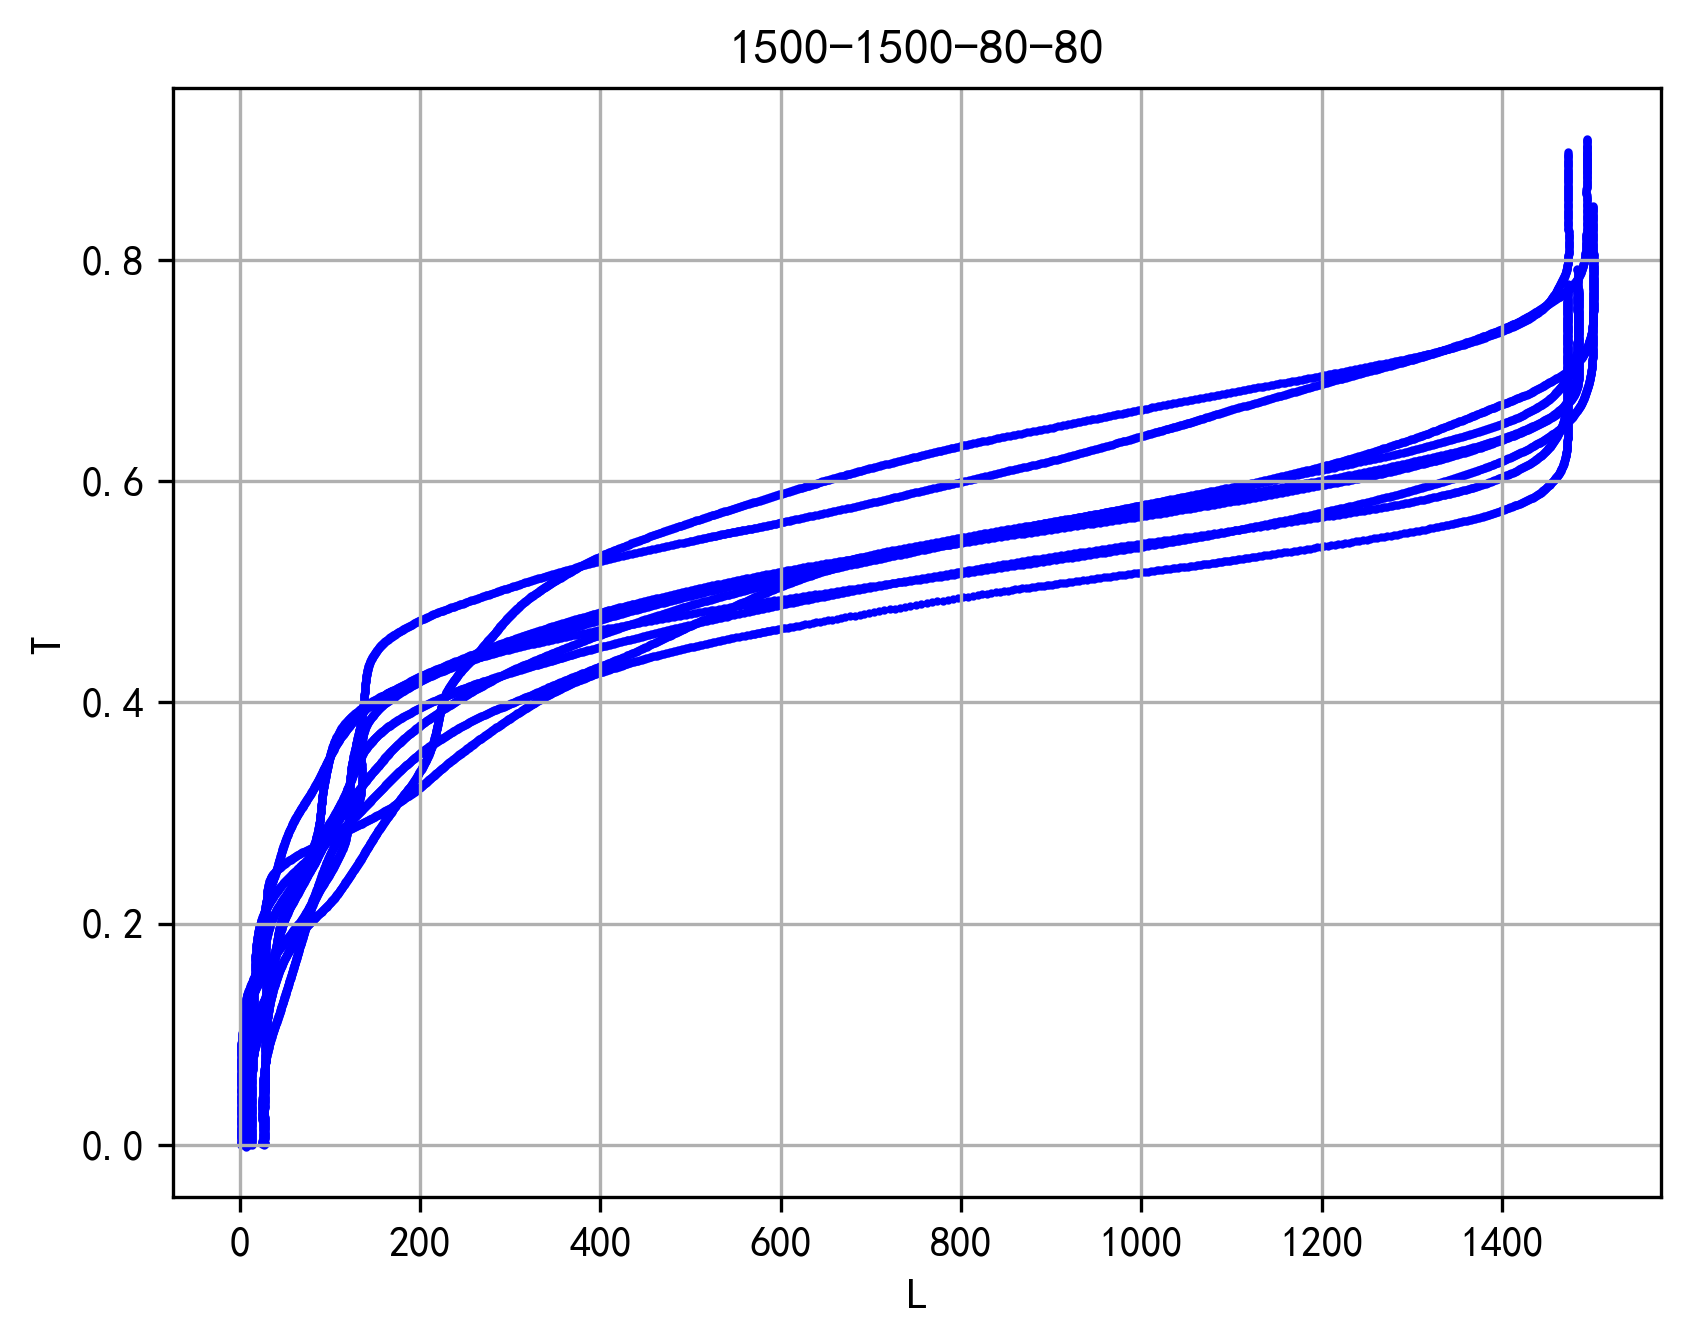

In [257]:
d1,d2=1500,1500
w1,w2=10,10

#由你的电脑的屏幕大小来决定
screen_width,screen_height=1920,1080

window_size = 100  # 窗口大小,导致线平缓度
poly_order = 4    # 多项式阶数

# 设置Kalman滤波器的测量噪声和过程噪声
measurement_noise = 20
process_noise = 0.1

def read_data(d1,d2,w1,w2):
    '''
    通过D,和W的大小来区分和读取数据，并返回四个数据结果。
    '''
    name=sys.path[0]+'\data\\'+'D='+str(d1)+'-'+str(d2)+'_W='+str(w1)+'-'+str(w2)+".bin"

    with open(name,'rb') as file:
        move_datas=pickle.load(file)
    
    return move_datas


def plotes(d1,d2,w1,w2):
    mouse_move=read_data(d1,d2,w1,w2)

    T_all=[]
    X_all=[]
    Y_all=[]
    for k in range(len(mouse_move)):
        T=[]
        X=[]
        Y=[]
        for i in range(len(mouse_move[k])):
            #print(mouse_move[0][i])
            T.append(mouse_move[k][-1][0]-mouse_move[k][i][0])
            X.append(mouse_move[k][i][1])
            Y.append(mouse_move[k][i][2])   

        # 使用Savitzky-Golay滤波器平滑数据
        
        T_smoothed = savgol_filter(T, window_size, poly_order)
        X_smoothed = savgol_filter(X, window_size, poly_order)
        Y_smoothed = savgol_filter(Y, window_size, poly_order)
        T_all.append(T_smoothed)
        X_all.append(X_smoothed)
        Y_all.append(Y_smoothed)
        
    D=d1
    W=w1

    right_box_CX=screen_width/2+D/2
    right_box_CY=screen_height/2

    L_all=[]

    for i in range(len(T_all)):
        l=[]
        for j in range(0,len(T_all[i])):
            l_=np.sqrt((X_all[i][j]-right_box_CX)**2+(Y_all[i][j]-right_box_CY)**2)
            l.append(l_)
        #l=savgol_filter(l, window_size, poly_order)
        L_all.append(l)
        

    plt.figure(dpi=300)
    for i in range(len(L_all)):

        
        plt.scatter(L_all[i],T_all[i], c='b', label='L', s=1)
        #plt.scatter(T_all[i],S_all[i], c='r', label='S', s=1)
        plt.title(str(d1)+'-'+str(d2)+'-'+str(w1)+'-'+str(w2))
        plt.xlabel('L')
        plt.ylabel('T')
        #plt.legend()
        plt.grid()
    plt.show()

for i in range(1,9):
    plotes(1500,1500,10*i,10*i)